In [61]:
# Importing Libraries


In [62]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px



In [63]:
# Importing Data

In [64]:
df = pd.read_excel("Fatality.xlsx" , skiprows=2)
df = df.truncate(before=0, after=253)
df

,County Name,Fatalities 2020-03-07,Fatalities 2020-03-08,Fatalities 2020-03-09,Fatalities 2020-03-10,Fatalities 2020-03-11,Fatalities 2020-03-12,Fatalities 2020-03-13,Fatalities 2020-03-14,Fatalities 2020-03-15,...,Fatalities 2020-09-17,Fatalities 2020-09-18,Fatalities 2020-09-19,Fatalities 2020-09-20,Fatalities 2020-09-21,Fatalities 2020-09-22,Fatalities 2020-09-23,Fatalities 2020-09-24,Fatalities 2020-09-25,Fatalities 2020-09-26
0,ANDERSON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
1,ANDREWS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2,ANGELINA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,81.0,81.0,81.0,82.0,82.0,82.0,82.0,82.0,82.0
3,ARANSAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
4,ARCHER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,WOOD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,23.0
250,YOAKUM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
251,YOUNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
252,ZAPATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [65]:
df2 = pd.read_excel("Hospital.xlsx", sheet_name= 'COVID-19 Hospitalizations', skiprows=2)
df2 = df2.truncate(before=0, after=21)
df2

,TSA ID,TSA AREA,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,...,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26
0,A.,Amarillo,17.0,17.0,17.0,40.0,18.0,24.0,18.0,35.0,...,71.0,62.0,63.0,63.0,63.0,74.0,74.0,73.0,79.0,84.0
1,B.,Lubbock,34.0,35.0,31.0,34.0,32.0,38.0,35.0,32.0,...,75.0,74.0,90.0,92.0,102.0,98.0,91.0,100.0,108.0,107.0
2,C.,Wichita Falls,5.0,5.0,6.0,4.0,5.0,0.0,0.0,0.0,...,36.0,39.0,29.0,26.0,24.0,25.0,25.0,25.0,26.0,30.0
3,D.,Abilene,6.0,7.0,2.0,6.0,5.0,8.0,3.0,10.0,...,32.0,31.0,28.0,15.0,19.0,23.0,23.0,21.0,15.0,17.0
4,E.,Dallas/Ft. Worth,369.0,365.0,373.0,449.0,470.0,476.0,428.0,435.0,...,754.0,754.0,733.0,754.0,749.0,772.0,784.0,785.0,807.0,804.0
5,F.,Paris,14.0,16.0,21.0,18.0,15.0,12.0,12.0,17.0,...,67.0,64.0,67.0,66.0,85.0,90.0,85.0,85.0,94.0,91.0
6,G.,Longview/Tyler,32.0,26.0,33.0,32.0,36.0,43.0,36.0,42.0,...,177.0,164.0,159.0,157.0,151.0,159.0,153.0,159.0,168.0,158.0
7,H.,Lufkin,15.0,18.0,23.0,15.0,28.0,24.0,37.0,27.0,...,48.0,42.0,31.0,43.0,52.0,46.0,52.0,60.0,57.0,44.0
8,I.,El Paso,14.0,23.0,12.0,30.0,24.0,28.0,33.0,24.0,...,122.0,128.0,138.0,140.0,146.0,142.0,146.0,140.0,143.0,151.0
9,J.,Midland/Odessa,10.0,11.0,17.0,7.0,10.0,15.0,12.0,10.0,...,73.0,56.0,58.0,56.0,51.0,57.0,54.0,51.0,50.0,57.0


In [66]:
df.keys()

Index(['County Name', 'Fatalities 2020-03-07', 'Fatalities 2020-03-08',
       'Fatalities 2020-03-09', 'Fatalities 2020-03-10',
       'Fatalities 2020-03-11', 'Fatalities 2020-03-12',
       'Fatalities 2020-03-13', 'Fatalities 2020-03-14',
       'Fatalities 2020-03-15',
       ...
       'Fatalities 2020-09-17', 'Fatalities 2020-09-18',
       'Fatalities 2020-09-19', 'Fatalities 2020-09-20',
       'Fatalities 2020-09-21', 'Fatalities 2020-09-22',
       'Fatalities 2020-09-23', 'Fatalities 2020-09-24',
       'Fatalities 2020-09-25', 'Fatalities 2020-09-26'],
      dtype='object', length=205)

In [67]:
df["County Name"]= df["County Name"].str.title() 
df = df.set_index('County Name')
df

,Fatalities 2020-03-07,Fatalities 2020-03-08,Fatalities 2020-03-09,Fatalities 2020-03-10,Fatalities 2020-03-11,Fatalities 2020-03-12,Fatalities 2020-03-13,Fatalities 2020-03-14,Fatalities 2020-03-15,Fatalities 2020-03-16,...,Fatalities 2020-09-17,Fatalities 2020-09-18,Fatalities 2020-09-19,Fatalities 2020-09-20,Fatalities 2020-09-21,Fatalities 2020-09-22,Fatalities 2020-09-23,Fatalities 2020-09-24,Fatalities 2020-09-25,Fatalities 2020-09-26
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
Angelina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,81.0,81.0,81.0,82.0,82.0,82.0,82.0,82.0,82.0
Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,23.0
Yoakum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Young,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [68]:
df2 = df2.drop(columns = 'TSA ID')
df2 = df2.set_index('TSA AREA')

In [69]:
df2.keys()

Index(['2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
       '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       ...
       '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21',
       '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-26'],
      dtype='object', length=168)

In [70]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
datesh = [datetime.strptime(pattern.findall(sub)[0], '%Y-%m-%d') for sub in df2.keys()]   
datesh

[datetime.datetime(2020, 4, 12, 0, 0),
 datetime.datetime(2020, 4, 13, 0, 0),
 datetime.datetime(2020, 4, 14, 0, 0),
 datetime.datetime(2020, 4, 15, 0, 0),
 datetime.datetime(2020, 4, 16, 0, 0),
 datetime.datetime(2020, 4, 17, 0, 0),
 datetime.datetime(2020, 4, 18, 0, 0),
 datetime.datetime(2020, 4, 19, 0, 0),
 datetime.datetime(2020, 4, 20, 0, 0),
 datetime.datetime(2020, 4, 21, 0, 0),
 datetime.datetime(2020, 4, 22, 0, 0),
 datetime.datetime(2020, 4, 23, 0, 0),
 datetime.datetime(2020, 4, 24, 0, 0),
 datetime.datetime(2020, 4, 25, 0, 0),
 datetime.datetime(2020, 4, 26, 0, 0),
 datetime.datetime(2020, 4, 27, 0, 0),
 datetime.datetime(2020, 4, 28, 0, 0),
 datetime.datetime(2020, 4, 29, 0, 0),
 datetime.datetime(2020, 4, 30, 0, 0),
 datetime.datetime(2020, 5, 1, 0, 0),
 datetime.datetime(2020, 5, 2, 0, 0),
 datetime.datetime(2020, 5, 3, 0, 0),
 datetime.datetime(2020, 5, 4, 0, 0),
 datetime.datetime(2020, 5, 5, 0, 0),
 datetime.datetime(2020, 5, 6, 0, 0),
 datetime.datetime(2020, 5, 7, 

In [71]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+')
df2.columns=[pattern.findall(sub)[0] for sub in df2.keys()]
df2

,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,...,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26
TSA AREA,,,,,,,,,,,,,,,,,,,,,
Amarillo,17.0,17.0,17.0,40.0,18.0,24.0,18.0,35.0,17.0,17.0,...,71.0,62.0,63.0,63.0,63.0,74.0,74.0,73.0,79.0,84.0
Lubbock,34.0,35.0,31.0,34.0,32.0,38.0,35.0,32.0,32.0,46.0,...,75.0,74.0,90.0,92.0,102.0,98.0,91.0,100.0,108.0,107.0
Wichita Falls,5.0,5.0,6.0,4.0,5.0,0.0,0.0,0.0,2.0,4.0,...,36.0,39.0,29.0,26.0,24.0,25.0,25.0,25.0,26.0,30.0
Abilene,6.0,7.0,2.0,6.0,5.0,8.0,3.0,10.0,6.0,7.0,...,32.0,31.0,28.0,15.0,19.0,23.0,23.0,21.0,15.0,17.0
Dallas/Ft. Worth,369.0,365.0,373.0,449.0,470.0,476.0,428.0,435.0,410.0,443.0,...,754.0,754.0,733.0,754.0,749.0,772.0,784.0,785.0,807.0,804.0
Paris,14.0,16.0,21.0,18.0,15.0,12.0,12.0,17.0,16.0,19.0,...,67.0,64.0,67.0,66.0,85.0,90.0,85.0,85.0,94.0,91.0
Longview/Tyler,32.0,26.0,33.0,32.0,36.0,43.0,36.0,42.0,45.0,47.0,...,177.0,164.0,159.0,157.0,151.0,159.0,153.0,159.0,168.0,158.0
Lufkin,15.0,18.0,23.0,15.0,28.0,24.0,37.0,27.0,24.0,24.0,...,48.0,42.0,31.0,43.0,52.0,46.0,52.0,60.0,57.0,44.0
El Paso,14.0,23.0,12.0,30.0,24.0,28.0,33.0,24.0,29.0,49.0,...,122.0,128.0,138.0,140.0,146.0,142.0,146.0,140.0,143.0,151.0


In [72]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%Y-%m-%d') for sub in df.keys()]   
dates

[datetime.datetime(2020, 3, 7, 0, 0),
 datetime.datetime(2020, 3, 8, 0, 0),
 datetime.datetime(2020, 3, 9, 0, 0),
 datetime.datetime(2020, 3, 10, 0, 0),
 datetime.datetime(2020, 3, 11, 0, 0),
 datetime.datetime(2020, 3, 12, 0, 0),
 datetime.datetime(2020, 3, 13, 0, 0),
 datetime.datetime(2020, 3, 14, 0, 0),
 datetime.datetime(2020, 3, 15, 0, 0),
 datetime.datetime(2020, 3, 16, 0, 0),
 datetime.datetime(2020, 3, 17, 0, 0),
 datetime.datetime(2020, 3, 18, 0, 0),
 datetime.datetime(2020, 3, 19, 0, 0),
 datetime.datetime(2020, 3, 20, 0, 0),
 datetime.datetime(2020, 3, 21, 0, 0),
 datetime.datetime(2020, 3, 22, 0, 0),
 datetime.datetime(2020, 3, 23, 0, 0),
 datetime.datetime(2020, 3, 24, 0, 0),
 datetime.datetime(2020, 3, 25, 0, 0),
 datetime.datetime(2020, 3, 26, 0, 0),
 datetime.datetime(2020, 3, 27, 0, 0),
 datetime.datetime(2020, 3, 28, 0, 0),
 datetime.datetime(2020, 3, 29, 0, 0),
 datetime.datetime(2020, 3, 30, 0, 0),
 datetime.datetime(2020, 3, 31, 0, 0),
 datetime.datetime(2020, 4, 

In [73]:
pattern = re.compile('[0-9]+-[0-9]+-[0-9]+')
df.columns=[pattern.findall(sub)[0] for sub in df.keys()]
df

,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,...,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
Angelina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,81.0,81.0,81.0,82.0,82.0,82.0,82.0,82.0,82.0
Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,23.0
Yoakum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Young,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [74]:
#Extracting TSA A County Data for merging all number of fatalities in for complete TSA 
TSA1 = df.loc[["Anderson",
"Briscoe",
"Carson" ,
"Childress" ,
"Collingsworth" ,
"Dallam",
"Deaf Smith",
"Donley",
"Gray",
"Hall",
"Hansford",
"Hartley",
"Hemphill",
"Hutchinson",
"Lipscomb",
"Moore",
"Ochiltree",
"Oldham",
"Parmer",
"Potter",
"Randall",
"Roberts",
"Sherman",
"Swisher",
"Wheeler" ]]
TSA1

,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,...,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
Briscoe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Carson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Childress,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Collingsworth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dallam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
Deaf Smith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
Donley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Gray,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [75]:
#Getting Total Number of Fatalities for the TSA
TSA1.loc["Total"] = TSA1.sum()
TSA1

,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,...,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0
Briscoe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Carson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Childress,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Collingsworth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dallam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
Deaf Smith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
Donley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Gray,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [76]:
df = df.T 
df

County Name,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,...,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-22,31.0,9.0,82.0,18.0,1.0,1.0,30.0,9.0,5.0,8.0,...,49.0,143.0,26.0,3.0,14.0,23.0,5.0,6.0,6.0,16.0
2020-09-23,31.0,9.0,82.0,18.0,1.0,1.0,30.0,9.0,5.0,8.0,...,49.0,143.0,26.0,3.0,14.0,23.0,5.0,6.0,6.0,16.0
2020-09-24,31.0,9.0,82.0,18.0,1.0,1.0,30.0,9.0,5.0,8.0,...,49.0,143.0,26.0,3.0,14.0,23.0,5.0,6.0,6.0,16.0
2020-09-25,31.0,9.0,82.0,18.0,1.0,1.0,30.0,9.0,5.0,8.0,...,49.0,143.0,26.0,3.0,14.0,23.0,5.0,6.0,6.0,16.0


No handles with labels found to put in legend.


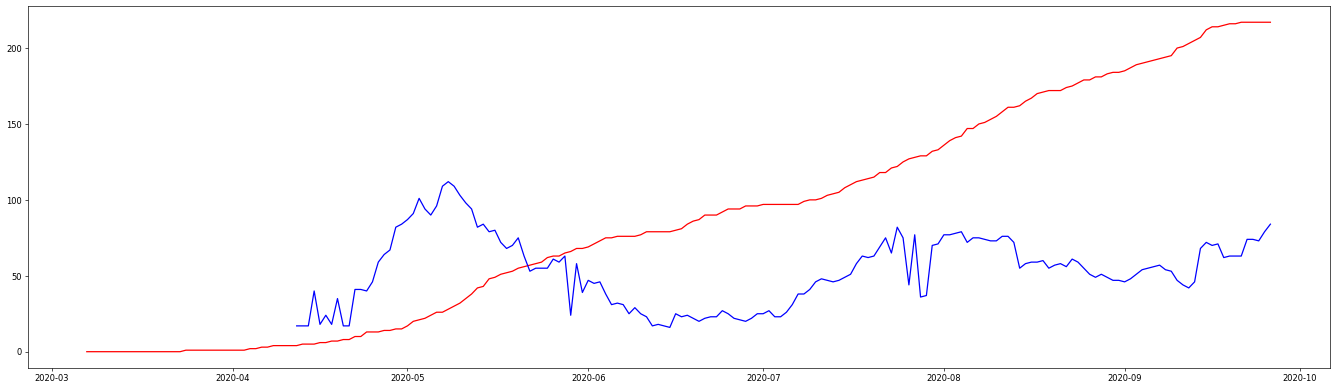

In [79]:
fig = plt.figure(figsize=(28,8), dpi=60)
ax1.title.set_text('Nueces County Cases')
ax1.set_ylim(0, 1500)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.plot(dates,TSA1.T['Total'], label="Fatality", color='red')
plt.plot(datesh,df2.T['Amarillo'], label="Hospitalization", color = 'blue')
ax1.legend()



